### Star Formation

_Author Wing-Fai Thi_

_Version 1.1 19/3/2018 add Bonamente's book in the reference_

_ 1.2 1/4/2018 add mosaic and parallel coordinate plots and references_

This notebook concerns two of the exercises in the book Modern Statistical Methods for Astronomy by E. Feigelson and J Babu. It shows that Data Science is not always about large amount of data. The results are howver very insightfull in the field of star- and protoplanetary- formation and early evolution.

#### Aim of the notebook

- Explore statistical methods applied to star-formation in nearby molceular clouds: contingency tables, hypothesis testings. More precisely, we will
    - compare the χ2 test and Fisher exact test to evaluate whether multiple protostars are more likely to produce jets than single protostars.
    - interpret standadized residual tables
    - use the protostellar jet data to investigate various approaches to the binomial proportion problem
    - analyse a contingency table of young star class membership in four nearby star-forming regions and derive an evolutionary scenario.
    
#### Reference
- Massimiliano Bonamente, Statistics and Analysis of Scientific Data, 2nd edition, Springer
- David Meyer, Achim Zeilies, Jurt Hornik Vizualising Contingency Tables in C. Chen, W. Haerdle, A. Unwin editors, Handbook of data Visualization, Springer
- Alfred Inselberg Parallel Coordinates: Visualization, Exploration and Classification of high-Dimensional Data in Handbook of data Visualization, Springer

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
from statsmodels.graphics.mosaicplot import mosaic
from pandas.plotting import parallel_coordinates
# get configuration file location
#print (mpl.matplotlib_fname())

# get configuration current settings
#print (mpl.rcParams)

# Change the default settings
mpl.rcParams.update({'figure.figsize': (9.0, 7.0),
                     'figure.dpi' : 300, # 300 dpi for print
                    'font.size': 14,
                     'legend.frameon': False,              
                     'legend.fontsize' : 12, 
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'axes.labelsize'  : 18  
                    })

One can create a mosaic plot from a contingency table. A mosiac plot allows to visualize multivariate categorical data in a rigorous and informative way.

In [2]:
# Load the 2x2 contingency table
df= pd.read_csv("ProtostallarJets.csv")

#### Part 1

The first part deals with the question: 
Does jets related to the multiplicity of the central object?

The table below contains in a contingency/frequency table format the result of a survey of jets.

In [3]:
df

,Multiplicity,No,Yes,Total
0,Single,9,5,14
1,Multiple,2,5,7
2,Total,11,10,21


In [4]:
# multiplicity statistics
print "General jet frequency:",10./21.

General jet frequency: 0.47619047619


In [5]:
print "Single protostar jet frequency:",5./14.

Single protostar jet frequency: 0.357142857143


In [6]:
print "Multiple protostar jet frequency:",5./7.

Multiple protostar jet frequency: 0.714285714286


By looking at the simple frequencies, one is tempted to conclude that multiple protostars tend to show jets more often than single protostars. Is that conclusion correct? We will use the analysis of the contingency/frequency table to help us.


In [7]:
from scipy.stats import fisher_exact, chi2_contingency
# we extract the table as numpy array
contingency_table = df[['No','Yes']]
contingency_table = np.array(contingency_table.drop([2]))

In [8]:
# hypothesis test of independence of the observed frequencies 
# in the contingency table
# Expected = row total x column total / all cell total
chi2,p_chi2,dof,expected = chi2_contingency(contingency_table)

We perform a Chi-square test.

In [9]:
print "Chi-square p-value is",p_chi2

Chi-square p-value is 0.27954138007236257


In [10]:
dfm = df.set_index('Multiplicity')
dfm = dfm[['Yes','No']]
dfm.drop('Total',inplace=True)
dfm.columns.names =['Jet?']
dfm

Jet?,Yes,No
Multiplicity,,
Single,5,9
Multiple,5,2


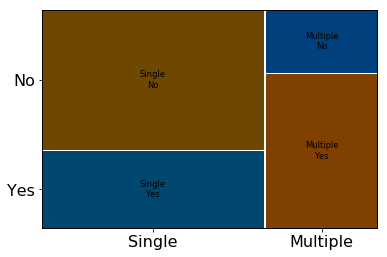

In [11]:
mosaic(dfm.stack(),gap=0.01,statistic=True)
plt.show()

In [12]:
df_expected=pd.DataFrame(expected,columns=['No','Yes'])
df_expected=pd.concat((df['Multiplicity'].drop(2),df_expected),axis=1)
df_expected

,Multiplicity,No,Yes
0,Single,7.333333,6.666667
1,Multiple,3.666667,3.333333


In [13]:
oddsratio , p_fisher = fisher_exact(contingency_table)

In [14]:
# Fisher exact test is appropriate for small-n samples.
print "Fisher's test p-value is", p_fisher

Fisher's test p-value is 0.18266253869969057


The probability that we would observe this or an even more imbalanced ratio by chance is about 18.2 % (27.9% for the chi-square test). A commonly used significance level is 5%. if we adopt that, we can therefore conclude that our observed imbalance is not statistically significant: no significant effect of protostellar multiplicity on jet formation is present.
The conlusion holds for the particular values in the table. The analyiss does not prevent bias in the sampling.

#### Standadized residual table

The standardized residual table is more meaningful and is quite simple to interpret. The standardized residuals are simply the deviation from the expected value in standard deviation. A strandar residual is the residual value divided by the square-root of the expected value.



In [15]:
# standardized residuals see statisticshowto.com
res = contingency_table-expected
st_res = res/np.sqrt(expected)
df_res=pd.DataFrame(res,columns=['No','Yes'])
df_res=pd.concat((df['Multiplicity'].drop(2),df_res),axis=1)
print "Resisuals"
df_res

Resisuals


,Multiplicity,No,Yes
0,Single,1.666667,-1.666667
1,Multiple,-1.666667,1.666667


All the standardized residual values are within 2-sigma deviation (in both directions). The higher occurence of jet for multiple protostars is most likely be due to pure chance.

In [16]:
# Wilson's estimator
count = 5.
total = 14.
nbar = total + 4.
pw = (count+2.)/nbar

In [17]:
from scipy.stats import norm
confidence = 0.95
alpha = 1.-confidence
z=norm.ppf(1-0.5*alpha)

We use the Wilson's estimator (Estimation of the ratio of binomial random variables, see Feigelson & Babu, p.80)

In [18]:
print "z-score=",z
interval=z*np.sqrt(pw*(1-pw)/nbar)
print pw,"+/-",interval

z-score= 1.959963984540054
0.388888888889 +/- 0.22520845746331428


The Wilson estimator confirms the previous conclusion.

#### Part 2

Aim: Test the null hypotheses that that the distribution of evolutionary classes is the same in all star-forming regions.

In [19]:
df2=pd.read_csv("ProtostatPopulations.csv")
df2

,Cloud,O-O/I,I-flat,II,Trans,III,Reference
0,Serpens,21,16,61,17,22,Winston et al. 2007
1,Chamaeleon I,1,14,90,4,95,Luhman et al. 2008
2,Taurus,2,42,179,5,126,Luhman et al. 2010
3,eta Cha,0,1,2,5,10,Sicilia-Aguilar et al. 2009


One can easily create by hand her/his own csv file with the values in the table above.

In [20]:
Type = ['O-O/I','I-flat','II','Trans','III']
RC1 = np.array(df2[Type])
from scipy.stats.contingency import margins
m0, m1 = margins(RC1)

In [21]:
row_proportion=pd.DataFrame(RC1/(1.*m0)*100.,columns=Type)
row_proportion=pd.concat((df2['Cloud'],row_proportion),axis=1)
row_proportion

,Cloud,O-O/I,I-flat,II,Trans,III
0,Serpens,15.328467,11.678832,44.525547,12.408759,16.058394
1,Chamaeleon I,0.490196,6.862745,44.117647,1.960784,46.568627
2,Taurus,0.564972,11.864407,50.564972,1.412429,35.593220
3,eta Cha,0.000000,5.555556,11.111111,27.777778,55.555556


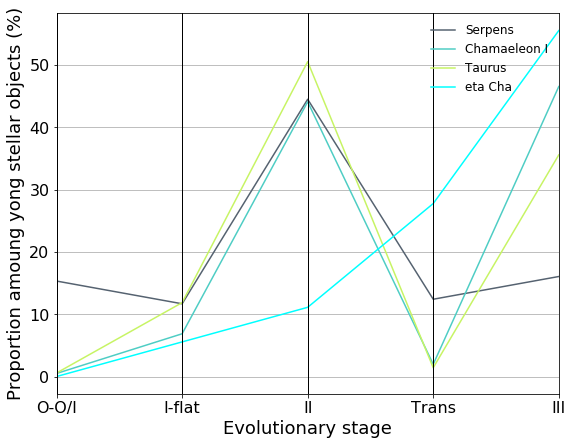

In [22]:
plt.figure(figsize=(9,7))
parallel_coordinates(row_proportion,'Cloud',
                     color=('#556270','#4ECDC4', '#C7F464','cyan'),alpha=1.0)
plt.xlabel('Evolutionary stage')
plt.ylabel('Proportion amoung yong stellar objects (%)')
plt.show()

In [23]:
column_proportion=pd.DataFrame(RC1/(1.*m1)*100.,columns=Type)
column_proportion=pd.concat((df2['Cloud'],column_proportion),axis=1)
column_proportion

,Cloud,O-O/I,I-flat,II,Trans,III
0,Serpens,87.500000,21.917808,18.373494,54.838710,8.695652
1,Chamaeleon I,4.166667,19.178082,27.108434,12.903226,37.549407
2,Taurus,8.333333,57.534247,53.915663,16.129032,49.802372
3,eta Cha,0.000000,1.369863,0.602410,16.129032,3.952569


In [24]:
chi2,p_chi2,dof,expected = chi2_contingency(RC1)

We perform a Chi-square test.

In [25]:
print "Chi-square p-value is",p_chi2

Chi-square p-value is 8.440817353859272e-28


The p-values << 1, significant differences exist.

In [26]:
# Expected = row total x column total / all cell total
df_expected=pd.DataFrame(expected,columns=Type)
df_expected=pd.concat((df2['Cloud'],df_expected),axis=1)
print "Expected"
df_expected

Expected


,Cloud,O-O/I,I-flat,II,Trans,III
0,Serpens,4.611501,14.026648,63.792426,5.956522,48.612903
1,Chamaeleon I,6.866760,20.886396,94.990182,8.869565,72.387097
2,Taurus,11.915849,36.244039,164.835905,15.391304,125.612903
3,eta Cha,0.605891,1.842917,8.381487,0.782609,6.387097


Table of expected values: Expected = row total x column total / all cell total

In [27]:
res = RC1-expected
df_res=pd.DataFrame(res,columns=Type)
df_res=pd.concat((df2['Cloud'],df_res),axis=1)
print "Resisuals"
df_res

Resisuals


,Cloud,O-O/I,I-flat,II,Trans,III
0,Serpens,16.388499,1.973352,-2.792426,11.043478,-26.612903
1,Chamaeleon I,-5.866760,-6.886396,-4.990182,-4.869565,22.612903
2,Taurus,-9.915849,5.755961,14.164095,-10.391304,0.387097
3,eta Cha,-0.605891,-0.842917,-6.381487,4.217391,3.612903


The residual table is just the contngency table values - the expected values.

In [28]:
# standardized residuals see statisticshowto.com
st_res = res/np.sqrt(expected)

In [29]:
df_st_res=pd.DataFrame(st_res,columns=Type)

In [30]:
df_st_res=pd.concat((df2['Cloud'],df_st_res),axis=1)

In [31]:
print "Standardized residuals"
df_st_res

Standardized residuals


,Cloud,O-O/I,I-flat,II,Trans,III
0,Serpens,7.631643,0.526899,-0.349621,4.524906,-3.816950
1,Chamaeleon I,-2.238837,-1.506816,-0.512008,-1.635080,2.657821
2,Taurus,-2.872549,0.956092,1.103222,-2.648697,0.034538
3,eta Cha,-0.778390,-0.620915,-2.204252,4.767290,1.429567


A couple of remarks can be made from the standardized residual table. The Serpens star-forming region has 7.6 sigma more class O and O-I objects than expected, while it has a strong deficit in class III objects (-3.8). eta Cha shows a siginificant excess of more evolved objects (Transition and class III objects) and a deficit of young class O - O/I objects. The Chamaeleon I and Taurus clouds have many intermediate stage class I-flat and class II objects. The standardized residual table illustrate the disk-formation stage of each cloud.

In [32]:
# adjusted residuals
row_total_proportion = 1.0*m0/m0.sum()
column_total_proportion = 1.0*m1/m1.sum()
adj_res = (RC1-expected)/np.sqrt(expected*
                (1.-row_total_proportion)*(1.-column_total_proportion))

In [33]:
df_adj_res=pd.DataFrame(adj_res,columns=Type)
df_adj_res=pd.concat((df2['Cloud'],df_adj_res),axis=1)
print "Adjusted residuals"
df_adj_res

Adjusted residuals


,Cloud,O-O/I,I-flat,II,Trans,III
0,Serpens,8.637473,0.618751,-0.532124,5.147491,-5.287080
1,Chamaeleon I,-2.695525,-1.882352,-0.828982,-1.978689,3.916314
2,Taurus,-4.118130,1.422171,2.126879,-3.816651,0.060599
3,eta Cha,-0.802019,-0.663803,-3.054189,4.937152,1.802697


The adjusted residual table is an alternative to the residual table and carries the same information.

One does not necessarily need large amounts of data to perform insightful
data analysis.

In [34]:
# sudo pip install FisherExact
from FisherExact import fisher_exact

In [35]:
pvalue = fisher_exact([[8, 2, 12], [1, 5, 2]])
pvalue

0.011825369366598965

In [36]:
df2

,Cloud,O-O/I,I-flat,II,Trans,III,Reference
0,Serpens,21,16,61,17,22,Winston et al. 2007
1,Chamaeleon I,1,14,90,4,95,Luhman et al. 2008
2,Taurus,2,42,179,5,126,Luhman et al. 2010
3,eta Cha,0,1,2,5,10,Sicilia-Aguilar et al. 2009


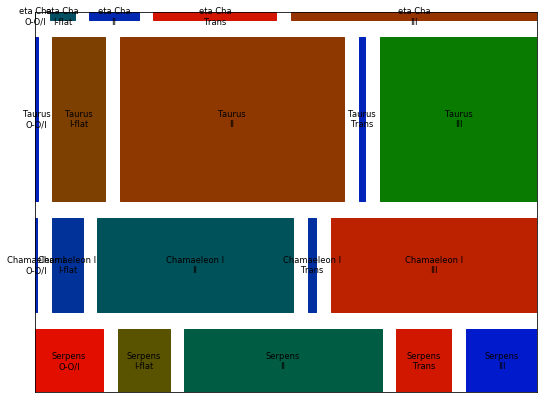

In [37]:
df2m = df2[['Cloud','O-O/I','I-flat','II','Trans','III']]
df2m = df2m.set_index('Cloud')
fig=plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)
m, rect = mosaic(df2m.stack(),ax=ax,gap=0.05,statistic=True,axes_label=False,horizontal=False)
plt.show()

In [38]:
df2m

,O-O/I,I-flat,II,Trans,III
Cloud,,,,,
Serpens,21,16,61,17,22
Chamaeleon I,1,14,90,4,95
Taurus,2,42,179,5,126
eta Cha,0,1,2,5,10
